170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 106s 163ms/step - accuracy: 0.2452 - loss: 2.0235 - val_accuracy: 0.4677 - val_loss: 1.4763
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 142s 164ms/step - accuracy: 0.4630 - loss: 1.4833 - val_accuracy: 0.5653 - val_loss: 1.2124
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 105s 168ms/step - accuracy: 0.5318 - loss: 1.3031 - val_accuracy: 0.6269 - val_loss: 1.0569
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 167ms/step - accuracy: 0.5795 - loss: 1.1888 - val_accuracy: 0.6337 - val_loss: 1.0315
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 175ms/step - accuracy: 0.6115 - loss: 1.1031 - val_accuracy: 0.6531 - val_loss: 0.9841
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 168ms/step - accuracy: 0.6354 - loss: 1.0368 - val_accuracy: 0.6913 - val_loss: 0.8802
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 162ms/step - accuracy: 0.6510 - loss: 0.9925 - val_accuracy: 0.6981 - val_loss: 0.8673
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 161ms/step - accuracy: 0.6655 -

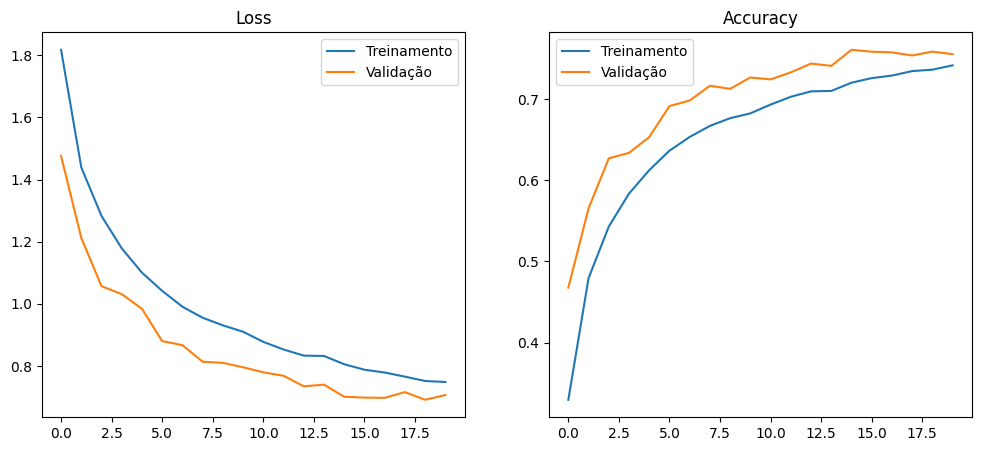

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Carregar e preparar dados (CIFAR-10 como exemplo)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Modelo com Dropout conforme diagrama
model = Sequential()

# Bloco 1
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Bloco 2
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Bloco 3
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Classificador
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compilar
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=64)

# Avaliação
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot das curvas
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Accuracy')
plt.legend()
plt.show()
